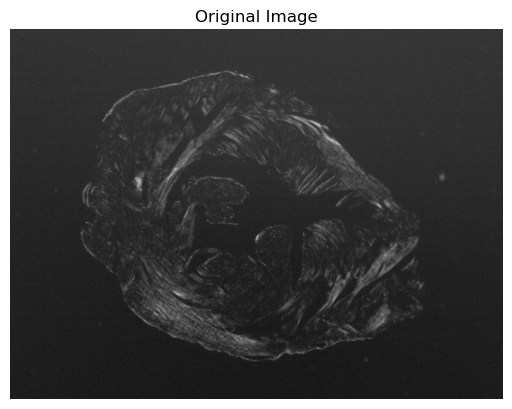

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("task3image.jpeg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()


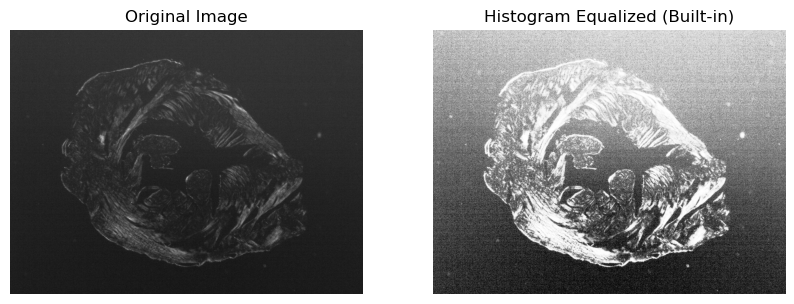

In [15]:
builtin_he = cv2.equalizeHist(img)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(builtin_he, cmap='gray')
plt.title("Histogram Equalized (Built-in)")
plt.axis("off")

plt.show()


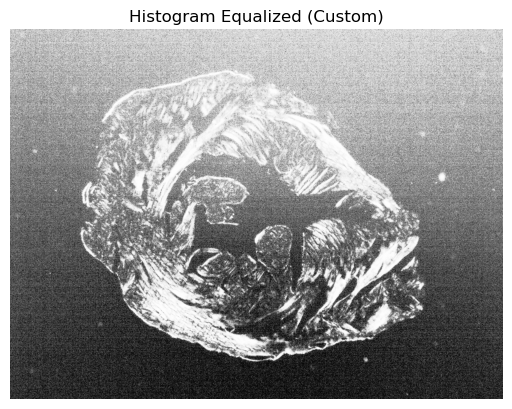

In [16]:
def custom_histogram_equalization(image):
    # Step 1: Histogram
    hist, _ = np.histogram(image.flatten(), 256, [0, 256])
    
    # Step 2: PDF
    pdf = hist / np.sum(hist)
    
    # Step 3: CDF
    cdf = pdf.cumsum()
    
    # Step 4: Normalize CDF to 0–255
    cdf_normalized = (cdf * 255).astype(np.uint8)
    
    # Step 5: Map pixel values
    equalized_image = cdf_normalized[image]
    
    return equalized_image

custom_he = custom_histogram_equalization(img)

plt.imshow(custom_he, cmap='gray')
plt.title("Histogram Equalized (Custom)")
plt.axis("off")
plt.show()


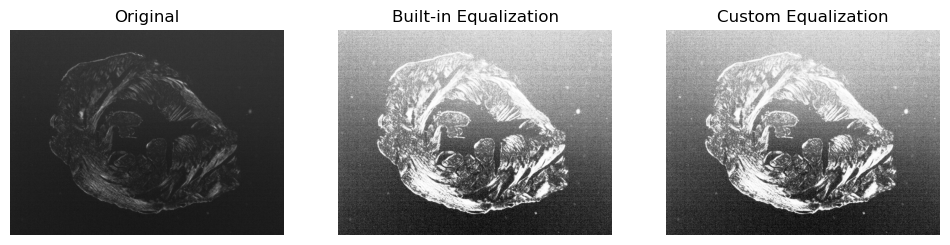

In [17]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(builtin_he, cmap='gray')
plt.title("Built-in Equalization")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(custom_he, cmap='gray')
plt.title("Custom Equalization")
plt.axis("off")

plt.show()


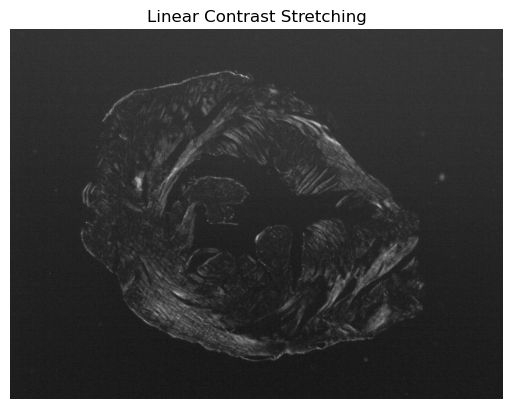

In [18]:
def linear_stretch(img):
    min_val = np.min(img)
    max_val = np.max(img)
    stretched = ((img - min_val) / (max_val - min_val)) * 255
    return stretched.astype(np.uint8)

linear_img = linear_stretch(img)

plt.imshow(linear_img, cmap='gray')
plt.title("Linear Contrast Stretching")
plt.axis("off")
plt.show()


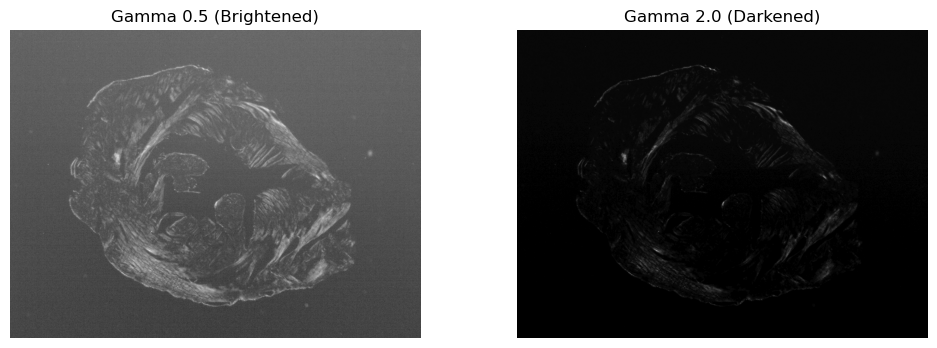

In [19]:
def gamma_transform(img, gamma):
    normalized = img / 255.0
    corrected = np.power(normalized, gamma)
    return (corrected * 255).astype(np.uint8)

gamma_light = gamma_transform(img, 0.5)  # Brightening
gamma_dark = gamma_transform(img, 2.0)   # Darkening

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.imshow(gamma_light, cmap='gray')
plt.title("Gamma 0.5 (Brightened)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(gamma_dark, cmap='gray')
plt.title("Gamma 2.0 (Darkened)")
plt.axis("off")

plt.show()


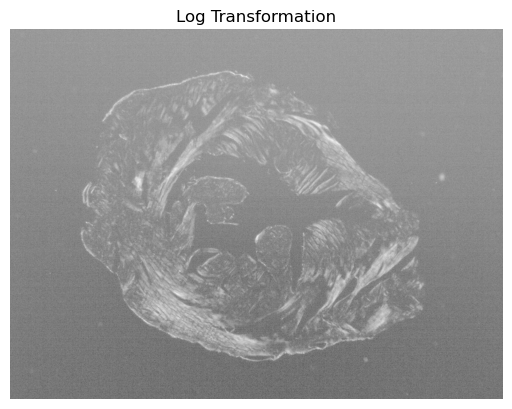

In [20]:
def log_transform(img):
    c = 255 / np.log(1 + np.max(img))
    log_img = c * np.log(1 + img)
    return log_img.astype(np.uint8)

log_img = log_transform(img)

plt.imshow(log_img, cmap='gray')
plt.title("Log Transformation")
plt.axis("off")
plt.show()


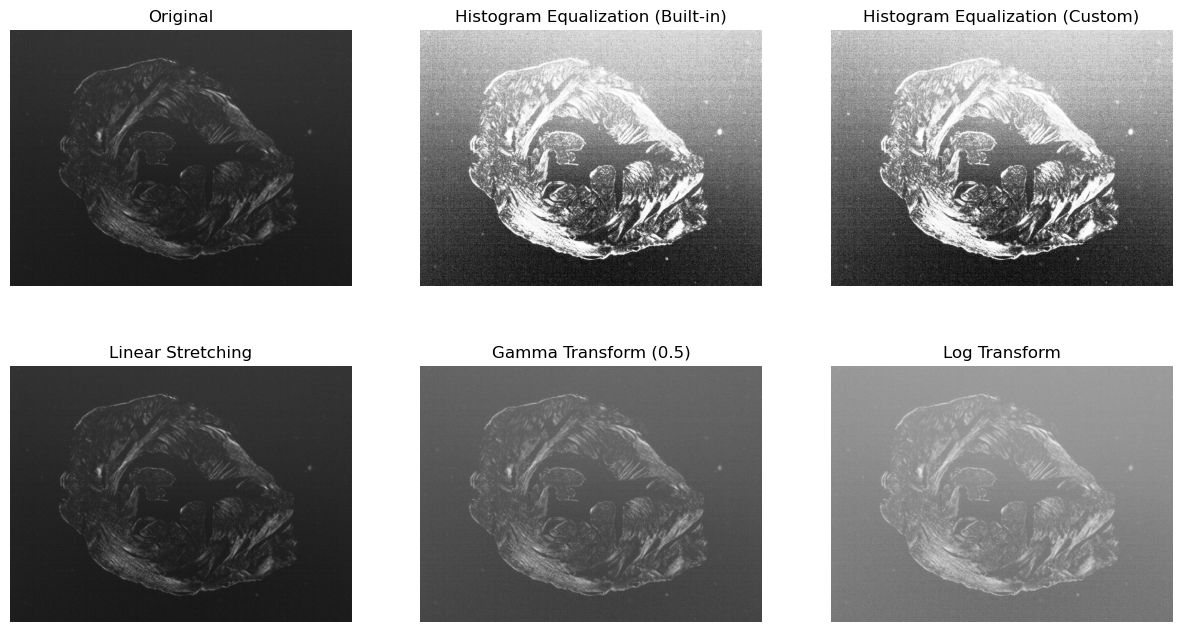

In [21]:
plt.figure(figsize=(15,8))

plt.subplot(2,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(2,3,2)
plt.imshow(builtin_he, cmap='gray')
plt.title("Histogram Equalization (Built-in)")
plt.axis("off")

plt.subplot(2,3,3)
plt.imshow(custom_he, cmap='gray')
plt.title("Histogram Equalization (Custom)")
plt.axis("off")

plt.subplot(2,3,4)
plt.imshow(linear_img, cmap='gray')
plt.title("Linear Stretching")
plt.axis("off")

plt.subplot(2,3,5)
plt.imshow(gamma_light, cmap='gray')
plt.title("Gamma Transform (0.5)")
plt.axis("off")

plt.subplot(2,3,6)
plt.imshow(log_img, cmap='gray')
plt.title("Log Transform")
plt.axis("off")

plt.show()
